In [1]:

# Dataframe
import pandas as pd

# Array
import numpy as np
import itertools

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime

# text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re


import unicodedata
tokenizer = ToktokTokenizer()

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from tqdm import tqdm
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier, Pool

#Word vector
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import np_utils
import gensim
import nltk
from gensim.models.word2vec import Word2Vec
import tensorflow as tf
from tqdm import tqdm

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
from xgboost import XGBClassifier


### Reading the Cleaned Dataset

In [3]:
# Read the file
df3 = pd.read_csv('clean_text.csv')


In [4]:
# Sample observations
df3.head(3)


,Unnamed: 0,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,rating_class,clean_text,Sentiment_score,Polarity
0,0,Charles Ojegbulu,Awesome,5,0,2.22.13.76,4/20/2022,good,awesome,"Sentiment(polarity=1.0, subjectivity=1.0)",1.00
1,1,Linet Kendi,It was the best,5,0,2.22.3.77,4/20/2022,good,best,"Sentiment(polarity=1.0, subjectivity=0.3)",1.00
2,2,Veronica James,Is so beautiful whatsapp,5,0,2.22.9.78,4/20/2022,good,beautiful whatsapp,"Sentiment(polarity=0.85, subjectivity=1.0)",0.85


# Word Vectorization

In [46]:
X = df3['clean_text'][:10000]
y = df3['rating_class'][:10000]

## Tokenizer

In [47]:
from keras.preprocessing.text import Tokenizer

samples = X
tokenizer = Tokenizer(lower=True ,split=' ') # creates tokenizer
tokenizer.fit_on_texts(samples)  # builds the word index
sequences = tokenizer.texts_to_sequences(samples) #turns strings into list of integers
# word_index is a dictionary mapping words to an integer index
word_index = tokenizer.word_index 
print(f'Found {len(word_index)} unique tokens. ')

Found 6485 unique tokens. 


In [48]:
word_index

{'good': 1,
 'app': 2,
 'nice': 3,
 'not': 4,
 'whatsapp': 5,
 'best': 6,
 'update': 7,
 'use': 8,
 'message': 9,
 'love': 10,
 'like': 11,
 'excellent': 12,
 'please': 13,
 'great': 14,
 'call': 15,
 'super': 16,
 'chat': 17,
 'work': 18,
 'ok': 19,
 'thank': 20,
 'one': 21,
 'status': 22,
 'time': 23,
 'easy': 24,
 'show': 25,
 'get': 26,
 'online': 27,
 'download': 28,
 'new': 29,
 'bad': 30,
 'want': 31,
 'no': 32,
 'awesome': 33,
 'go': 34,
 'phone': 35,
 'see': 36,
 'problem': 37,
 'make': 38,
 'really': 39,
 'experience': 40,
 'help': 41,
 'send': 42,
 'amaze': 43,
 'add': 44,
 'need': 45,
 'video': 46,
 'know': 47,
 'much': 48,
 'better': 49,
 'friends': 50,
 'hi': 51,
 'option': 52,
 'even': 53,
 'people': 54,
 'fix': 55,
 'feature': 56,
 'open': 57,
 'apps': 58,
 'group': 59,
 'try': 60,
 'contact': 61,
 'useful': 62,
 'application': 63,
 'back': 64,
 'issue': 65,
 'number': 66,
 'also': 67,
 'wonderful': 68,
 'ever': 69,
 'block': 70,
 'aap': 71,
 'always': 72,
 'give': 73,


In [49]:
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sequences[0]])

In [50]:
def sequence_to_text(sequence):
    words =  [reverse_word_index.get(letter) for letter in sequence]
    return words

my_text = list(map(sequence_to_text, sequences))

In [51]:
print(sequences[0])

[33]


## Word2Vec and Simple Neural Network

In [52]:
word2vec = gensim.models.Word2Vec(my_text,vector_size=100,window=10,min_count=1)
word2vec.train(my_text, total_examples=25026, epochs=10)

(237112, 315950)

In [57]:
similar_words = {search_term: [item[0] for item in word2vec.wv.most_similar([search_term], topn=5)]
                  for search_term in ['feel', 'good', 'product', 'cheap', 'bad', 'great']}
similar_words

{'feel': ['name', 'turn', 'home', 'th', 'right'],
 'good': ['nice', 'useful', 'helpful', 'wonderful', 'love'],
 'product': ['application', 'things', 'better', 'quick', 'touch'],
 'cheap': ['ftd', 'unblock', 'password', 'despite', 'fitur'],
 'bad': ['new', 'could', 'stop', 'something', 'notification'],
 'great': ['amaze', 'like', 'awesome', 'use', 'better']}

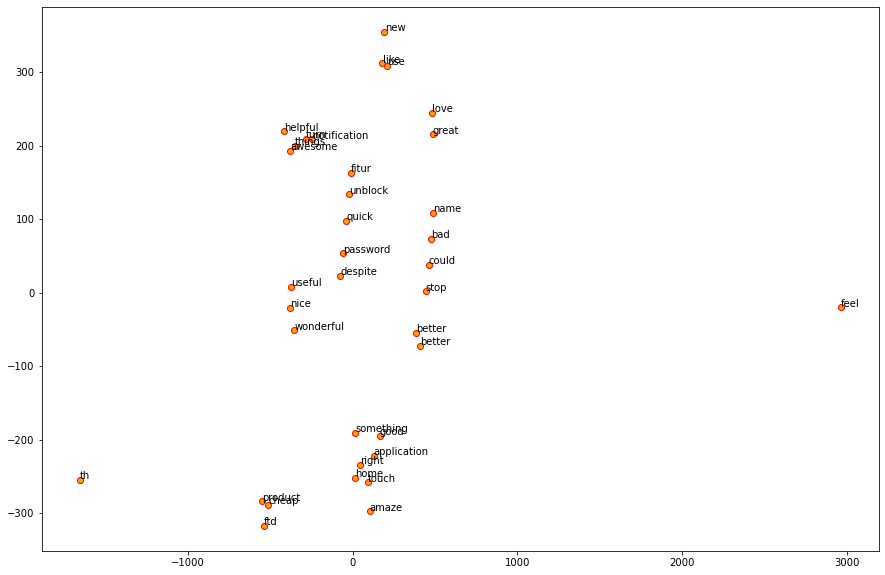

In [58]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = word2vec.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(15, 10))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r',)
for label, x, yt in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, yt+1), xytext=(0, 0), textcoords='offset points')

In [59]:
len(word_index.keys())

6485

# Natural Language Processing


## 1. Feature Engineering and Selection

Machine Learning models take numerical values as input. Our dataset is a list of sentences, so in order for our algorithm to extract patterns from the data, we first need to find a way to represent it in a way that our algorithm can understand, i.e. as a list of numbers.

We will implement CounterVectorizer, TF-IDF, Hash Vectorizer, Word2Vec, adding most common words into the stopwords list, SMOTE, PCA, and Truncated SVD techniques into our models in the following sections as a part of feature engineering and selection.

## 2. Data Preprocessing


###### Separating Response Variable and Feature


In [9]:
df3['rating_class'] = df3['rating_class'].apply(lambda x: 0 if x == 'bad' else 1)

In [10]:
# Splitting the Data Set into Train and Test Sets
X = df3['clean_text'][:10000]
y = df3['rating_class'][:10000]

### Splitting Dataset into Train and Test Set

We split our data in to a training set used to fit our model and a test set to see how well it generalizes to unseen data.



In [11]:
# Splitting Dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Print train and test set shape
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))


Train Set Shape		:(7500,)
Test Set Shape		:(2500,)


## 3. Selecting the Right Evaluation Metric

Since the data is imbalanced, the evaluation of the classifier performance must be carried out using adequate metrics in order to take into account the class distribution and to pay more attention to the minority class. When the positive class is smaller and the ability to detect correctly positive samples is our main focus (correct detection of negatives examples is less important to the problem) we should use precision and recall. For our particular case, based on this thought I will use f1 score which is harmonic average of precision and recall as my evaluation metric.

### Confusion Matrix Plot Function

Understanding the types of errors our model makes, and least desirable are important . A good way to visualize that information is using a Confusion Matrix, which compares the predictions our model makes with the true label. With that in mind, we used confusion matrix besides our evaluation metric (f1 score).


In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt


In [13]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Bad','Good'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()


## 4. Modelling

This is a supervised binary classification problem. We are trying to predict the sentiment based on the reviews left by customers who bought headphones products in Amazon e-commerce online platform. We used Python’s Scikit Learn libraries to solve the problem. In this context, we implemented Logistic Regression, Random Forest, Naive Bayes, XGBOOST, and Catboost algorithms. Besides that, I implemented deep learning technique with Keras.

Since the ratings of the reviews were not distributed normally, I decided to decrease rating classes from 5 to 2 by merging Rating 1-2 as ‘Bad’ and Rating 3-4-5 as 'Good'.

For feature selection, I applied threshold for word occurence with using min_df/max_df, PCA and Singular Value Decomposition.

For feature engineering, I applied CountVectorizer, TF-IDF, Hashing Vectorizer and Word2Vec to the text data in order to turn a collection of text documents into numerical feature vectors.



In [14]:
# Create the word vector with CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()


In [15]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 5246


In [16]:
# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names()

In [17]:
# Dataframe for train countvectorizer dataset
pd.DataFrame(count_vect_train, columns = vocab).head()

,__,___,_________,____________,_______nxhdlgglkggjfjfjjfjkfhdxlggghhgsgkgdhfhdhjfjgjjffhfjfjfjgjfkvjfjgjfhngjchhxxbngvkvkjcgjchfjxhxxhxbbfhxhchfbfhfnccccvhhbkfufg,__akash_,_c,_we,aa,aaa,...,zs,zubair,zuck,zudy,zuheb,zukiswa,zy,zzz,zzzz,zzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Creating a function for applying different algorithms


In [18]:
def modeling(Model, Xtrain = count_vect_train, Xtest = count_vect_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

### Dummy Classifier

In [19]:
clf = DummyClassifier(strategy = 'stratified', random_state =42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))

f1 score: 0.7048160908668457


In [20]:
# Compute and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.23      0.22       465
           1       0.82      0.81      0.81      2035

    accuracy                           0.70      2500
   macro avg       0.52      0.52      0.52      2500
weighted avg       0.71      0.70      0.70      2500



#### 4.1.1 Logistic Regression with CountVectorizer

In [21]:
# Call the modeling function for logistic regression with countvectorizer and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred

f1 score: 0.7214961667257243


##### Classification Report

In [22]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_logreg))

              precision    recall  f1-score   support

           0       0.34      0.71      0.46       465
           1       0.91      0.69      0.78      2035

    accuracy                           0.69      2500
   macro avg       0.62      0.70      0.62      2500
weighted avg       0.80      0.69      0.72      2500



#### Confusion Matrix

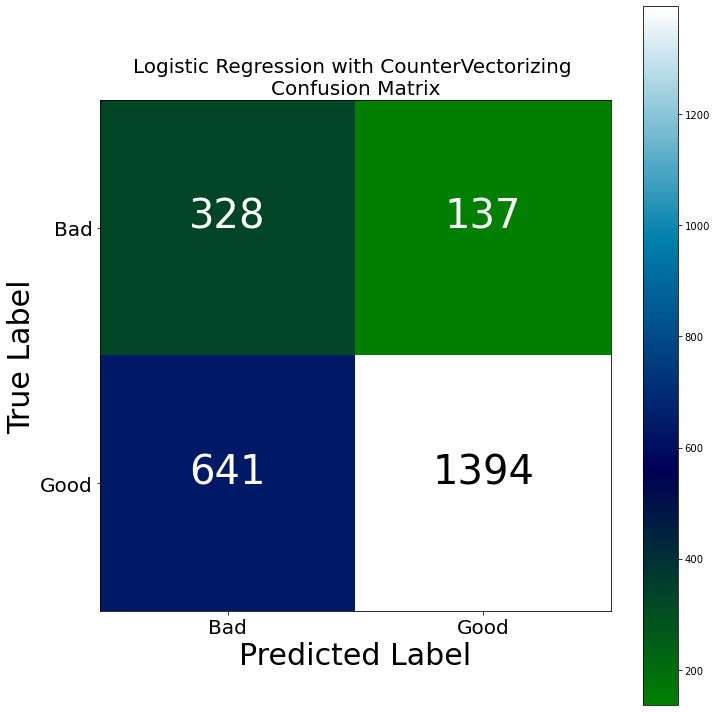

In [23]:
# Print confusion matrix for logistic regression with countvectorizer
disp_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")

### 4.1.2 Random Forest with CountVectorizer¶


In [24]:
# Call the modeling function for random forest classifier with countvectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_rf = y_pred

f1 score: 0.7955435444034792


######  Classification Report


In [25]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_rf))

              precision    recall  f1-score   support

           0       0.53      0.27      0.36       465
           1       0.85      0.95      0.90      2035

    accuracy                           0.82      2500
   macro avg       0.69      0.61      0.63      2500
weighted avg       0.79      0.82      0.80      2500



### Confusion Matrix

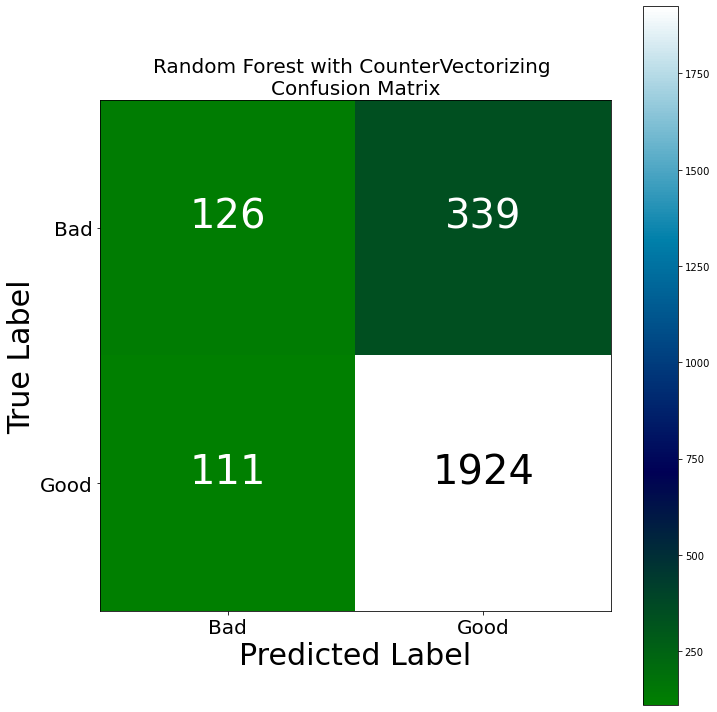

In [26]:
# Print confusion matrix for random forest classifier with countVectorizer
disp_confusion_matrix(y_pred_cv_rf, "Random Forest")

### 4.1.3 Naive Bayes with CountVectorizer

In [27]:
# Call the modeling function for naive bayes with countvectorizer and print f1 score
modeling(MultinomialNB())

# Assign y_pred to a variable for further process
y_pred_cv_nb = y_pred

f1 score: 0.8013527974527082


#### Classification Report

In [28]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_nb))

              precision    recall  f1-score   support

           0       0.59      0.26      0.36       465
           1       0.85      0.96      0.90      2035

    accuracy                           0.83      2500
   macro avg       0.72      0.61      0.63      2500
weighted avg       0.80      0.83      0.80      2500



##### Confusion Matrix

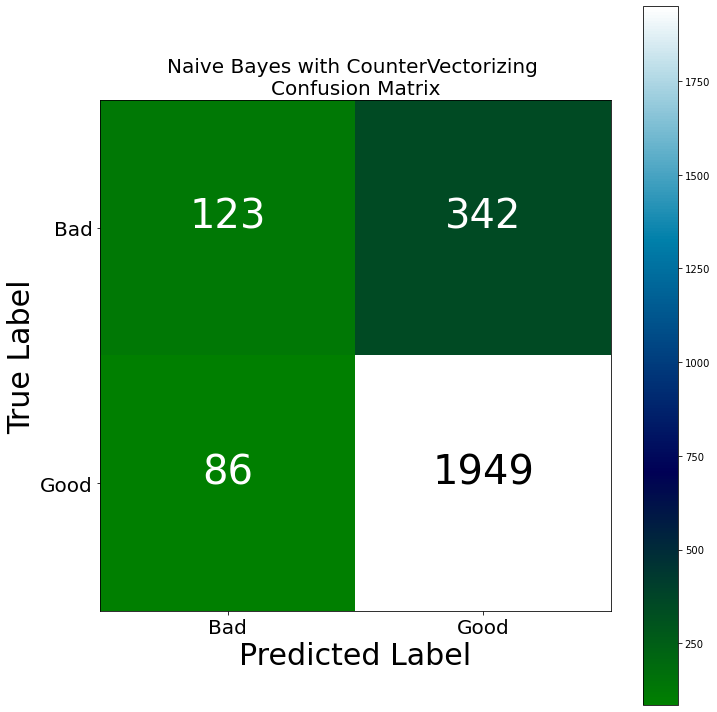

In [29]:
# Print confusion matrix for naive bayes with countVectorizer
disp_confusion_matrix(y_pred_cv_nb, "Naive Bayes")

##### 4.1.4 XGBoost with CountVectorizer


In [30]:
# Call the modeling function for XGBoost with countvectorizer and print f1 score
modeling(XGBClassifier())

# Assign y_pred to a variable for further process
y_pred_cv_xgb = y_pred

f1 score: 0.7946541438979965


##### Classification Report

In [31]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_xgb))

              precision    recall  f1-score   support

           0       0.66      0.20      0.31       465
           1       0.84      0.98      0.90      2035

    accuracy                           0.83      2500
   macro avg       0.75      0.59      0.61      2500
weighted avg       0.81      0.83      0.79      2500



#### Confusion Matrix

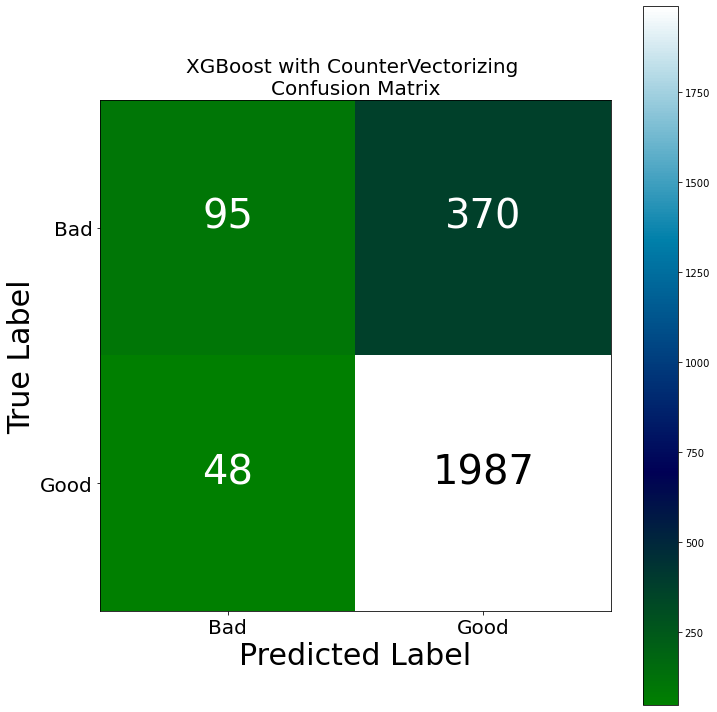

In [32]:
# Print confusion matrix for gradient boosting with countVectorizer
disp_confusion_matrix(y_pred_cv_xgb, "XGBoost")

### 4.1.5 CatBoost with CountVectorizer

In [33]:
# Call the modeling function for CatBoost with countvectorizer and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, 
                            depth=2, loss_function='Logloss'))

# Assign y_pred to a variable for further process
y_pred_cv_catboost = y_pred

0:	learn: 0.4827713	total: 171ms	remaining: 16.9s
1:	learn: 0.4647566	total: 183ms	remaining: 8.99s
2:	learn: 0.4564263	total: 195ms	remaining: 6.3s
3:	learn: 0.4535285	total: 205ms	remaining: 4.91s
4:	learn: 0.4516866	total: 216ms	remaining: 4.11s
5:	learn: 0.4500762	total: 227ms	remaining: 3.56s
6:	learn: 0.4482533	total: 237ms	remaining: 3.15s
7:	learn: 0.4452928	total: 247ms	remaining: 2.84s
8:	learn: 0.4426131	total: 261ms	remaining: 2.64s
9:	learn: 0.4400467	total: 273ms	remaining: 2.45s
10:	learn: 0.4380924	total: 282ms	remaining: 2.28s
11:	learn: 0.4355172	total: 293ms	remaining: 2.15s
12:	learn: 0.4337670	total: 302ms	remaining: 2.02s
13:	learn: 0.4323915	total: 313ms	remaining: 1.92s
14:	learn: 0.4304554	total: 325ms	remaining: 1.84s
15:	learn: 0.4286014	total: 333ms	remaining: 1.75s
16:	learn: 0.4273677	total: 344ms	remaining: 1.68s
17:	learn: 0.4265145	total: 353ms	remaining: 1.61s
18:	learn: 0.4254245	total: 361ms	remaining: 1.54s
19:	learn: 0.4244617	total: 371ms	remainin

### Classification Report


In [34]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_catboost))

              precision    recall  f1-score   support

           0       0.63      0.20      0.30       465
           1       0.84      0.97      0.90      2035

    accuracy                           0.83      2500
   macro avg       0.74      0.59      0.60      2500
weighted avg       0.80      0.83      0.79      2500



#### Confusion Matrix

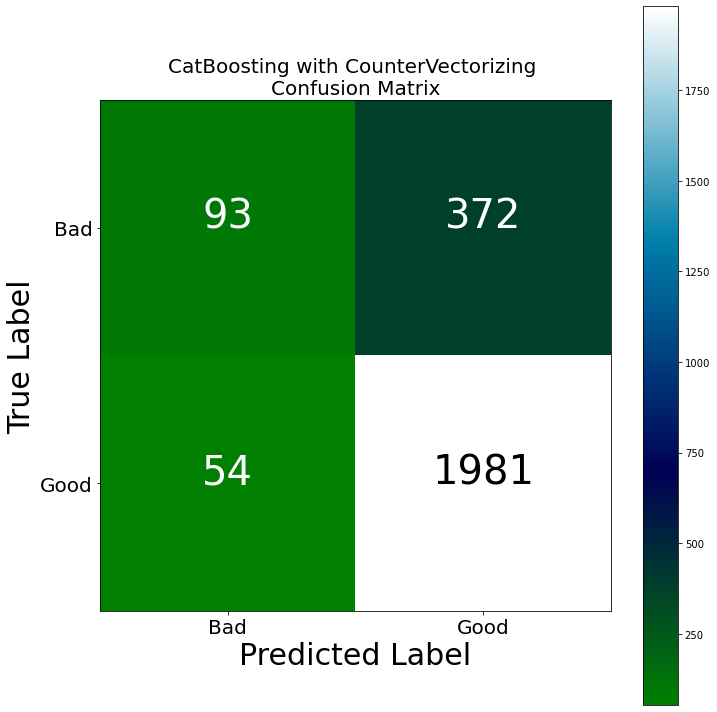

In [35]:
# Print confusion matrix for CatBoost with countVectorizer
disp_confusion_matrix(y_pred_cv_catboost, "CatBoosting")

4.1.6 Comparison of Models with CountVectorizer

In [36]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['bad', 'good', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [37]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

##### Function for f1 Score Plotting

In [38]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

### Algorithms Comparison with CountVectorizer

In [39]:
comparison_table(y_preds = [y_pred_cv_logreg, y_pred_cv_rf, y_pred_cv_nb, y_pred_cv_xgb, y_pred_cv_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [40]:
df_tv2

precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.6888   bad       0.338493  0.705376  0.457462   
                                  good      0.910516  0.685012  0.781828   
                                  average   0.804120  0.688800  0.721496   
           Random Forest 0.8200   bad       0.531646  0.270968  0.358974   
                                  good      0.850199  0.945455  0.895300   
                                  average   0.790948  0.820000  0.795544   
           Naive Bayes   0.8288   bad       0.588517  0.264516  0.364985   
                                  good      0.850720  0.957740  0.901063   
                                  average   0.801950  0.828800  0.801353   
           XGBoost       0.8328   bad       0.664336  0.204301  0.312500   
                                  good      0.843021  0.976413  0.904827   
                                  average   0.809785  0.832800  0.794654   
           CatBoost      0.8296   bad       0.632653  0.200000  0.303922   
                                  good      0.841904  0.973464  0.902917   
                                  average   0.802983  0.829600  0.791504   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.6888   bad        465.0  
                                  good      2035.0  
                                  average   2500.0  
           Random Forest 0.8200   bad        465.0  
                                  good      2035.0  
                                  average   2500.0  
           Naive Bayes   0.8288   bad        465.0  
                                  good      2035.0  
                                  average   2500.0  
           XGBoost       0.8328   bad        465.0  
                                  good      2035.0  
                                  average   2500.0  
           CatBoost      0.8296   bad        465.0  
                                  good      2035.0  
                                  average   2500.0

#### Average f1 Score - Models with CountVectorizer

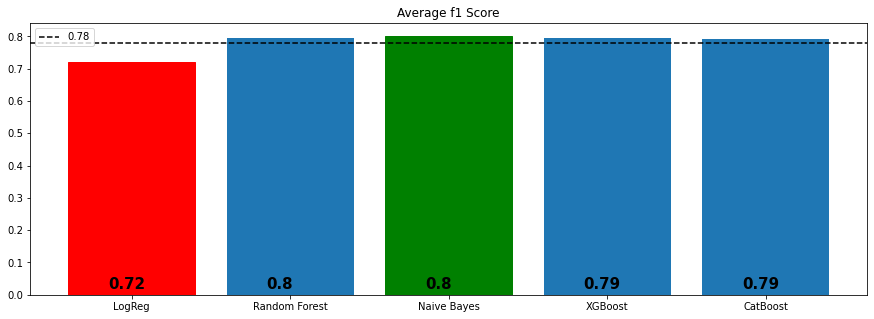

In [41]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")